In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [3]:
data = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv')
updata = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv',encoding='latin-1')

#data stores only 2024 data
#updata stores data from 19 years


In [4]:
print(len(data))

143


In [5]:
missing = data.isnull().sum()
print(missing)
nonmissing = data.dropna()

print(nonmissing.info())

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   upperwhisker                  140 non-null    float64
 4   lowerwhisker                  140 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   So

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

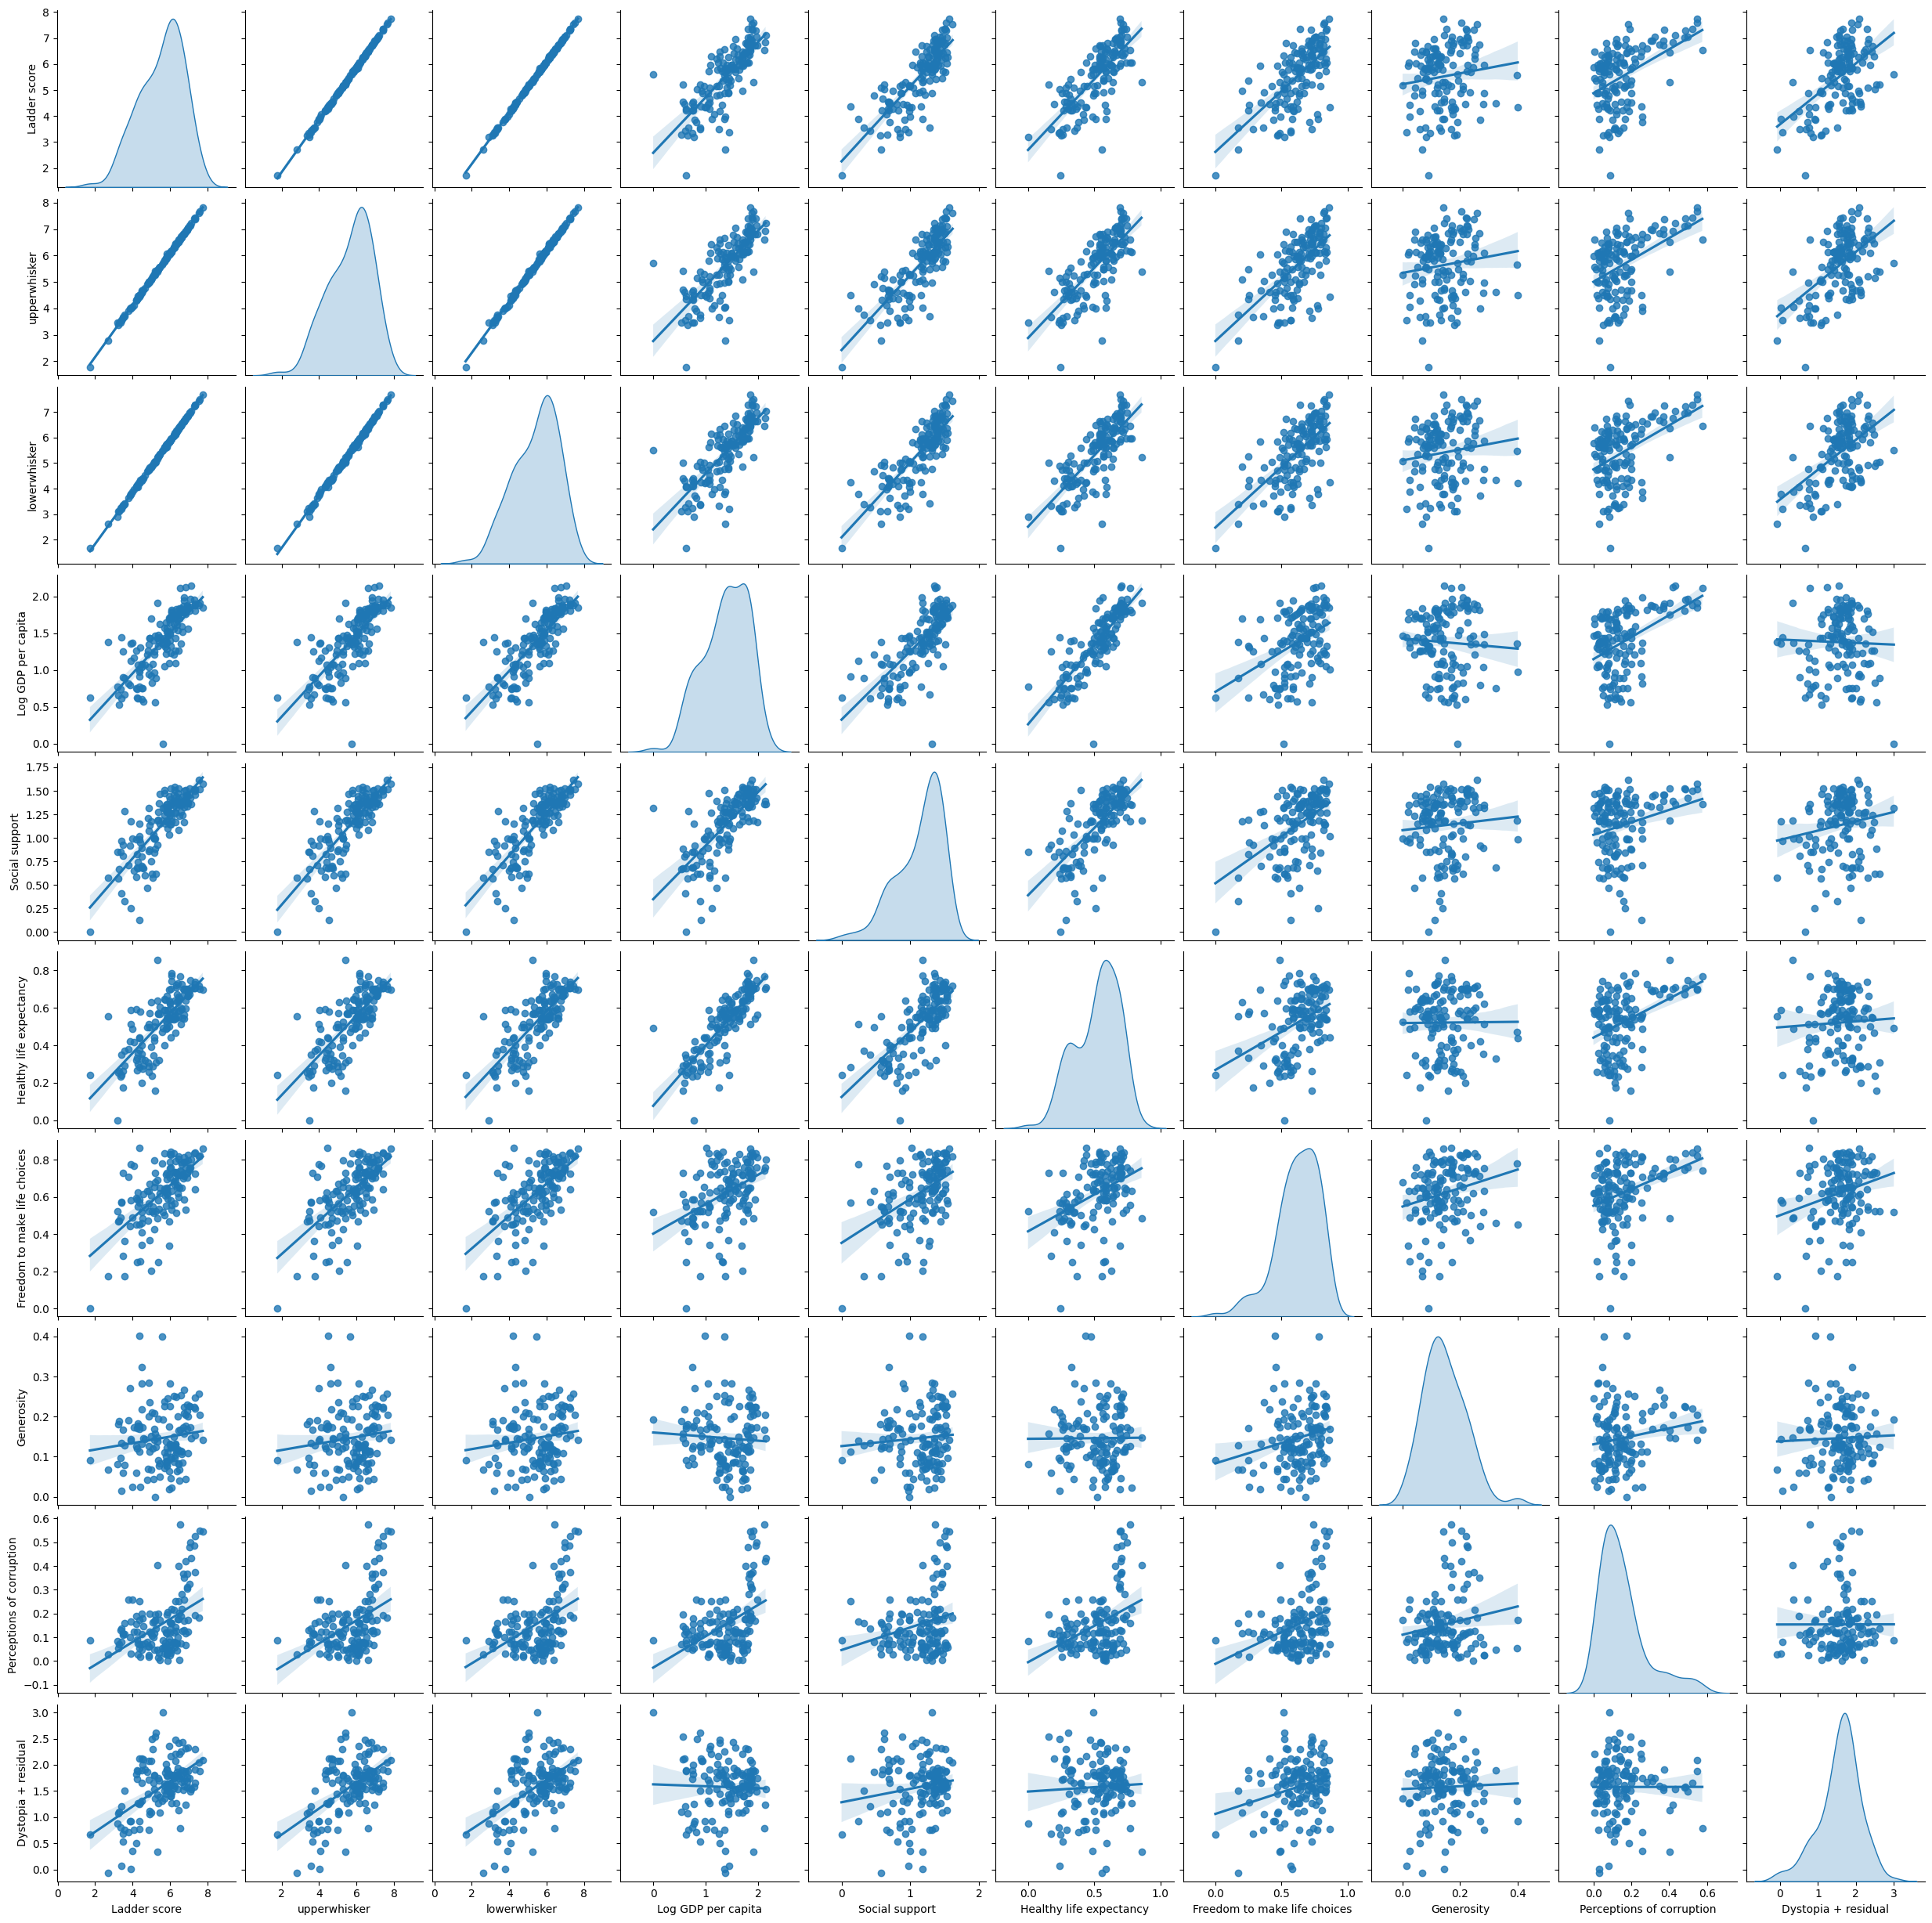

In [18]:
sns.pairplot(data=nonmissing, kind='reg', diag_kind = 'kde')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


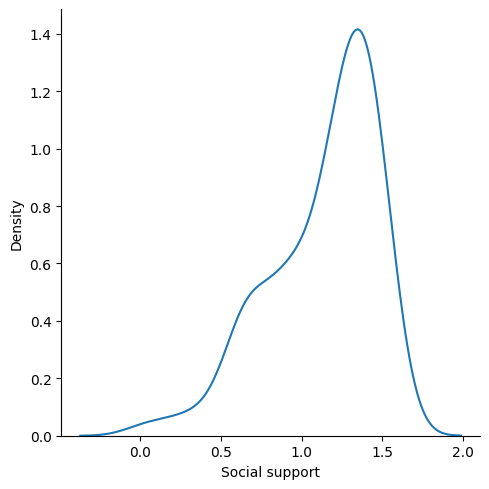

In [17]:
sns.displot(data=nonmissing, x = 'Social support', kind = 'kde')


In [ ]:
#sns.boxplot(data = nonmissing, x = 'Social support')

In [11]:
us_data = updata[updata['Country name'] =='United States']
print(us_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2225 to 2242
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      18 non-null     object 
 1   year                              18 non-null     int64  
 2   Life Ladder                       18 non-null     float64
 3   Log GDP per capita                18 non-null     float64
 4   Social support                    17 non-null     float64
 5   Healthy life expectancy at birth  18 non-null     float64
 6   Freedom to make life choices      18 non-null     float64
 7   Generosity                        17 non-null     float64
 8   Perceptions of corruption         18 non-null     float64
 9   Positive affect                   18 non-null     float64
 10  Negative affect                   18 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   upperwhisker                  140 non-null    float64
 1   lowerwhisker                  140 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(9)
memory usage: 10.9 KB
None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.9999998504515771

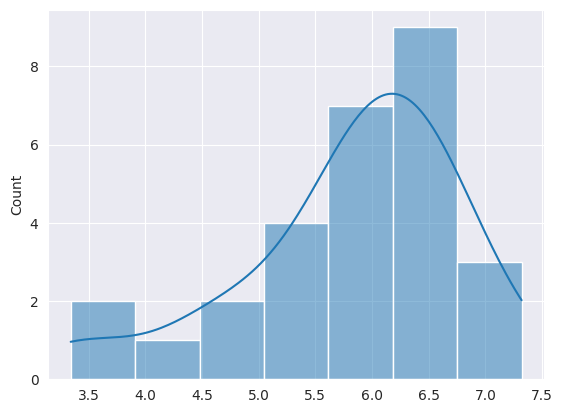

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#preprocess
#nonmissing.info()
#print(nonmissing['Regional indicator'].values)
data = pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv')
nonmissing = data.dropna()
regression_df = nonmissing.drop(['Country name', 'Regional indicator'], axis = 1)
y = regression_df.pop('Ladder score')

X_train, X_test, y_train, y_test = train_test_split(regression_df, y, test_size = 0.2, random_state = 1)
print(regression_df.info())

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
sns.histplot(predictions,kde = True)

model.score(X_test, y_test)

int64
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


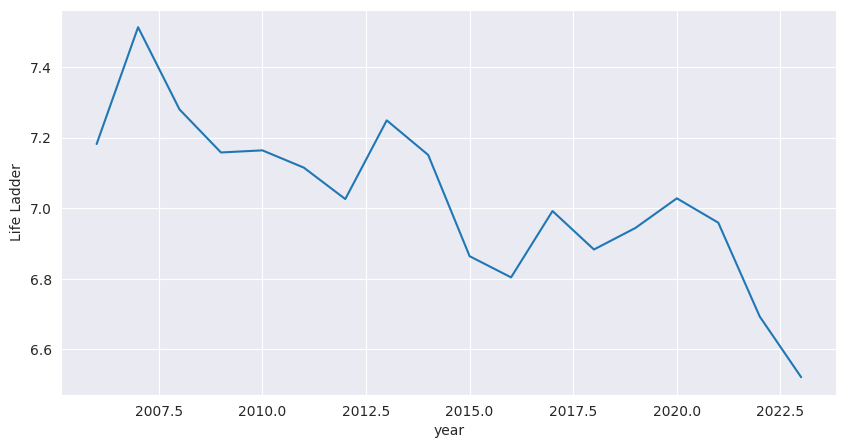

In [12]:
print(us_data.year.dtype)
print(us_data['year'].values)
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
lp = sns.lineplot(x=us_data['year'], y = us_data['Life Ladder'])

In [ ]:
sns.scatterplot(x=,y = 'upperwhisker')